# Лабораторная работа №1 «Численное решение дифференциальных уравнений»



## Вступление

В первой лабораторной Вашей задачей будет изучить и реализовать различные методы для численного решения дифференциальных уравнений.

Наверное, из курса физики Вы успели заметить, что дифференциальные уравнения появляются при описании явлений современного мира практически повсеместно, и практически никогда эти уравнения невозможно разрешить даже в квадратурах (выразив $y(x)$ через элементарные функции и интегралы от них).

Однако, физическими задачами уже никого не удивить, а уравнение движения маятника Вам уже, наверное, набило оскомину. Да и складывающееся ощущение, что дифференциальные уравнения возникают только лишь в задачах естествознания, ошибочно. Чтобы показать это, в качестве задачи в данной лабораторной работе рассматривается интересный пример использования дифференциальных уравнений в задачах искусственного интеллекта. *Неожиданно?!* Давайте разбираться.

## Задание 1. Численное решение дифференциального уравнения первого порядка.

Прежде чем приступить к интеллекту искусственному, применим интеллект естественный для реализации функций численного решения дифференциальных уравнений.


### Описание задачи

Так как дальше нам понадобится решать систему уравнений, то сразу будем решать задачу Коши
$$
\begin{cases} x(t)' = f(t, x(t)),\\ x(t_0) = x_0 \end{cases} \quad \text{где } x,x_0 \in \mathbb{R}^n, \ t \in [t_0,T].
$$

Рассмотрим два, наверное, самых распространенных метода:
- Метод ломаных Эйлера,
- Метод Рунге—Кутты.

Импортируем необходимые нам далее библиотеки.

In [2]:
#Блок 1: Импорт
import numpy as np
import matplotlib.pyplot as plt
import time

# Для корректного отображения русского текста
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False  # Для корректного отображения минусов

# Если необходимо, включить отображение графиков внутри Jupyter
%matplotlib inline
import matplotlib.ticker as mtick


#### Метод ломаных Эйлера

Метод Эйлера — это канонический и, честно говоря, простейший численный метод для решения дифференциальных уравнений. Мы будем искать приближение решения в виде ломаной. Для того, чтобы построить ломаную, нужно найти координаты ее вершин, этим и займемся.



##### Теоретические выкладки

Зададим на отрезке $[t_0, T]$ некоторое разбиение $\big\{t_m\big\}_{m=0}^M$.

Пусть $\varphi(t)$ — истинное решение. Разложим функцию$^*$ $\varphi(t)$ по Тейлору в точке $t_k ,\;  k \in \{0,1,\dots,M-1\}$:
$$
\varphi(t) = \varphi(t_k) + (t-t_k)\cdot \varphi'(t_k) + \mathrm{\overline o}\left(t-t_k\right).
$$
Подставим $t=t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k)  + \mathrm{\overline o}\left(t_{k+1}-t_k \right).
$$
Обозначим $h_k = t_{k+1} - t_k$ и обрубим наше разложение, отбросив о-малое. Тогда
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot \varphi'(t_k)
$$
— приближенное значение $\varphi(t_{k+1})$, $\psi(t_0) = x_0$.

Так как $\varphi(t)$ — решение уравнения $x'=f(t,x)$, то $\varphi'(t) = f(t, \varphi(t))$, а значит
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot f(t_k, \varphi(t_k)).
$$
Так как $\psi(t_k)$ — приближенное значение $\varphi (t_k)$, то, с некоторой потерей точности, в правой части можем заменить все $\varphi(t_k)$ на $\psi(t_k)$.

Тогда получаем множество упорядоченных вершин ломаной Эйлера:
$$\boxed{\psi(t_{k+1}) = \psi(t_k) + h_k \cdot f(t_k, \psi(t_k)), \quad \psi(t_0) = x_0}$$

Тогда для построения приближенного решения задачи Коши достаточно запустить вычисление вплоть до $\psi(t_M)$.

Более подробно, а именно: то, почему метод сходится, какая погрешность получается и т.д., обсуждалось на практических занятиях.

<sub>* В случае, когда у нас система уравнений, то есть $x$ является вектором, просто проделываем данные рассуждения  покомпонентно.</sub>

##### Реализация метода

Реализуйте метод ломаных Эйлера для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Euler_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

In [3]:
# Блок 2: Реализация метода Эйлера


def Euler_method(fun, t, x_0, dt, args={}):
    t_0, T = t
    num_steps = int((T - t_0) / dt)

    # Инициализация массивов для значений t и x
    t_values = np.linspace(t_0, T, num_steps + 1)
    x_values = np.zeros((num_steps + 1, len(x_0)))

    # Начальное условие
    x_values[0] = x_0

    # Основной цикл интегрирования
    for n in range(num_steps):
        tn = t_values[n]
        xn = x_values[n]

        # Вычисление значения функции f(t, x) и обновление x_n+1 по формуле Эйлера
        x_values[n + 1] = xn + dt * fun(tn, xn, **args)

    return t_values, x_values

#### Метод Рунге-Кутты

Теперь рассмотрим не столько геометрически понятный, но достаточно часто применяемый на практике метод Рунге—Кутты, ограничившись лишь вторым порядком последнего.

##### Теоретические выкладки

Так как $\varphi$ — решение исходной задачи Коши, то $\varphi'(t) = f(t, \varphi(t))$, а также
$$
\varphi''(t) = \frac{d}{d t} f(t, \varphi(t)) = \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} \frac{d\varphi(t)}{dt}= \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} f(t,\varphi(t)).
$$

Аналогично тому, что делали ранее, воспользуемся разложением Тейлора на отрезке в точке $t_k$ и подставим точку $t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \varphi''(t_k) + \mathrm{\overline o}\left((t_{k+1}-t_k)^2\right).
$$
Отбросим слагаемое с о-малым, тем самым переходя к приближению $\psi$ функции $\varphi$; подставим выражения для $\varphi'$, $\varphi''$. Получим
$$
\psi(t_{k+1}) = \psi(t_k) + (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \left.\left(f'_t(t, \psi) + f'_\psi(t, \psi) f(t,\psi(t))\right)\right|_{(t_k, \psi(t_k))}. \tag{o}
$$

Запишем теперь разложение Тейлора функции двух переменных $f(t,\psi)$ в точке $(t_k, \psi(t_k))$ и подставим точку $\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big)$, где $\alpha > 0$ --- параметр метода,
$$
f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big) \approx f(t_k, \psi(t_k)) + \alpha(t_{k+1}-t_k)f'_t(t_k, \psi(t_k)) + \alpha(t_{k+1} - t_k)  f(t_k, \psi(t_k))f'_\psi(t_k, \psi(t_k)).
$$

Заметим, что это очень похоже на правую часть в выражении (o). Тогда, домножив на $\frac{1}{2\alpha} (t_{k+1}-t_k)$, получим
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2\alpha}(t_{k+1} - t_k) f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big).
$$

Или, вводя обозначение длины шага $h_k = t_{k+1} - t_k$, получаем итерационную схему для метода Рунге—Кутты 2-ого порядка
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) h_k \cdot \underbrace{f(t_k, \psi(t_k))}_{k_1} + \frac{1}{2\alpha} h_k \cdot  \underbrace{f\big(t_{k}+\alpha h_k, \psi(t_{k})+ \alpha h_k f(t_k, \psi(t_k))\big)}_{k_2},
$$
Переобозначив под более принятые обозначения, получим
$$
\boxed{
    \begin{split}
        &\psi(t_{k+1}) = \psi(t_k) + b_1 h_k k_1 + b_2 h_k k_2,\\
        & k_1 = f(t_k, \psi(t_k)), \quad k_2 = f\big(t_{k}+a_{21} h_k, \psi(t_{k})+ a_{21} h_k f(t_k, \psi(t_k))\big),\\
        & b_1, b_2 \geqslant 0, \quad b_1 + b_2 = 1, \quad a_{21} = \frac{1}{b_2}.
    \end{split}
}
$$


##### Реализация метода

Реализуйте метод Рунге-Кутты для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Runge_Kutta_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

В зависимости от Вашего номера в таблице, возьмите $b_2 = \frac{1}{6}$

In [4]:
# Блок 3: Реализация метода Рунге-Кутты 2-го порядка


def Runge_Kutta_method(fun, t, x_0, dt, args={}):

    b1 = 1-1/6
    b2 = 1/6


    # Распаковываем интервалы t и определяем шаг
    t_0, T = t
    num_steps = int((T - t_0) / dt)

    # Инициализация массивов для значений t и x
    t_values = np.linspace(t_0, T, num_steps + 1)
    x_values = np.zeros((num_steps + 1, len(x_0)))

    # Начальное условие
    x_values[0] = x_0

    # Основной цикл интегрирования
    for n in range(num_steps):
        tn = t_values[n]
        xn = x_values[n]

        # Вычисление k1 и k2 с использованием фиксированных коэффициентов b1 и b2
        k1 = dt * fun(tn, xn, **args)
        k2 = dt * fun(tn + b1 * dt, xn + b2 * k1, **args)

        # Обновление значения решения
        x_values[n + 1] = xn + (1 - b1) * k1 + b1 * k2

    return t_values, x_values
    y_values[0] = y0

    # Основной цикл интегрирования
    for n in range(num_steps):
        tn = t_values[n]
        yn = y_values[n]

        # Вычисление промежуточных значений
        k1 = fun(tn, yn, **args)
        k2 = fun(tn + dt, yn + dt * k1)

        # Обновление значения y на следующем шаге
        y_values[n + 1] = yn + (dt / 2) * (k1 + k2)

    return t_values, y_values

In [5]:
# Блок 4: Реализация функции анализа

def msd(numerical_solution, t_values):
    analytical_solution = phi(t_values)
    return np.sqrt(np.mean((numerical_solution - analytical_solution) ** 2))

def evaculate_methods(t_interval, x0, steps):
    errors_euler, errors_rk2 = [], []
    times_euler, times_rk2 = [], []

    plt.figure(figsize=(14, 10))

    for h in steps:
        start_time = time.time()
        t_values_euler, x_values_euler = Euler_method(f, t_interval, x0, h)
        times_euler.append(round(time.time() - start_time, 6))
        errors_euler.append(round(msd(np.array(x_values_euler).flatten(), t_values_euler), 6))

        start_time = time.time()
        t_values_rk2, x_values_rk2 = Runge_Kutta_method(f, t_interval, x0, h)
        times_rk2.append(round(time.time() - start_time, 6))
        errors_rk2.append(round(msd(np.array(x_values_rk2).flatten(), t_values_rk2), 6))

        plt.plot(t_values_euler, x_values_euler, label=f'Эйлер (h={h})')
        plt.plot(t_values_rk2, x_values_rk2, label=f'Рунге-Кутта 2-го порядка (h={h})')

    plt.plot(t_values_rk2, phi(t_values_rk2), 'k--', label='Аналитическое решение')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Сравнение численных методов с аналитическим решением')
    plt.legend()
    plt.grid()
    plt.show()

    print("\nОшибки метода Эйлера:", errors_euler)
    print("Ошибки метода Рунге-Кутты 2-го порядка:", errors_rk2)

    plt.figure(figsize=(10, 6))
    plt.plot(steps, errors_euler, 'o-', label='Ошибка метода Эйлера')
    plt.plot(steps, errors_rk2, 'o-', label='Ошибка метода Рунге-Кутты 2-го порядка')
    plt.xlabel('Шаг h')
    plt.ylabel('Среднеквадратичная ошибка')
    plt.title('Ошибка методов в зависимости от шага')
    plt.legend()
    plt.grid()
    plt.show()

    print("\nВремя выполнения метода Эйлера:", times_euler)
    print("Время выполнения метода Рунге-Кутты 2-го порядка:", times_rk2)

    plt.figure(figsize=(10, 6))
    plt.plot(steps, times_euler, 'o-', label='Время метода Эйлера')
    plt.plot(steps, times_rk2, 'o-', label='Время метода Рунге-Кутты 2-го порядка')
    plt.xlabel('Шаг h')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Время выполнения методов в зависимости от шага')
    plt.legend()
    plt.grid()
    plt.show()


#### Примеры

Давайте проверим Вашу реализацию на примерах.

###### 1. Оба метода справляются неплохо

Придумайте пример дифференциального уравнения Бернулли c $\alpha = 2$, для которого Вы можете найти точное решение в явном виде и предложенные методы дают хорошие результаты. Также придумайте некоторые начальные условия и отрезок, на котором ищется решение.

Решите задачу аналитическим (это Вам придется сделать честным способом на бумажке)

https://drive.google.com/file/d/1Ljo16gIl2PE7ZgnGHLKc1WP_87DYY9hY/view?usp=sharing

In [ ]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''
def f(t, y):
    return t * y**2 - y


In [ ]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''
def phi(t):
    return 1 / (t + 1)

Проведите **анализ** относительно связи величины шага $h$, метода и получившейся ошибки.

> Ваше исследование должно содержать как минимум:
- сравнение ошибок для метода Эйлера с разными значениями шага ($\geqslant 3$),
- сравнение ошибок для метода Рунге-Кутты с разными значениями шага ($\geqslant 3$),
- сравнение методов Эйлера и Рунге-Кутты между собой:
    - разница в ошибках при одинаковых шагах
    - разница в шагах при (приблизительно) одинаковой ошибке


❗ **Место для Вашего решения** ❗

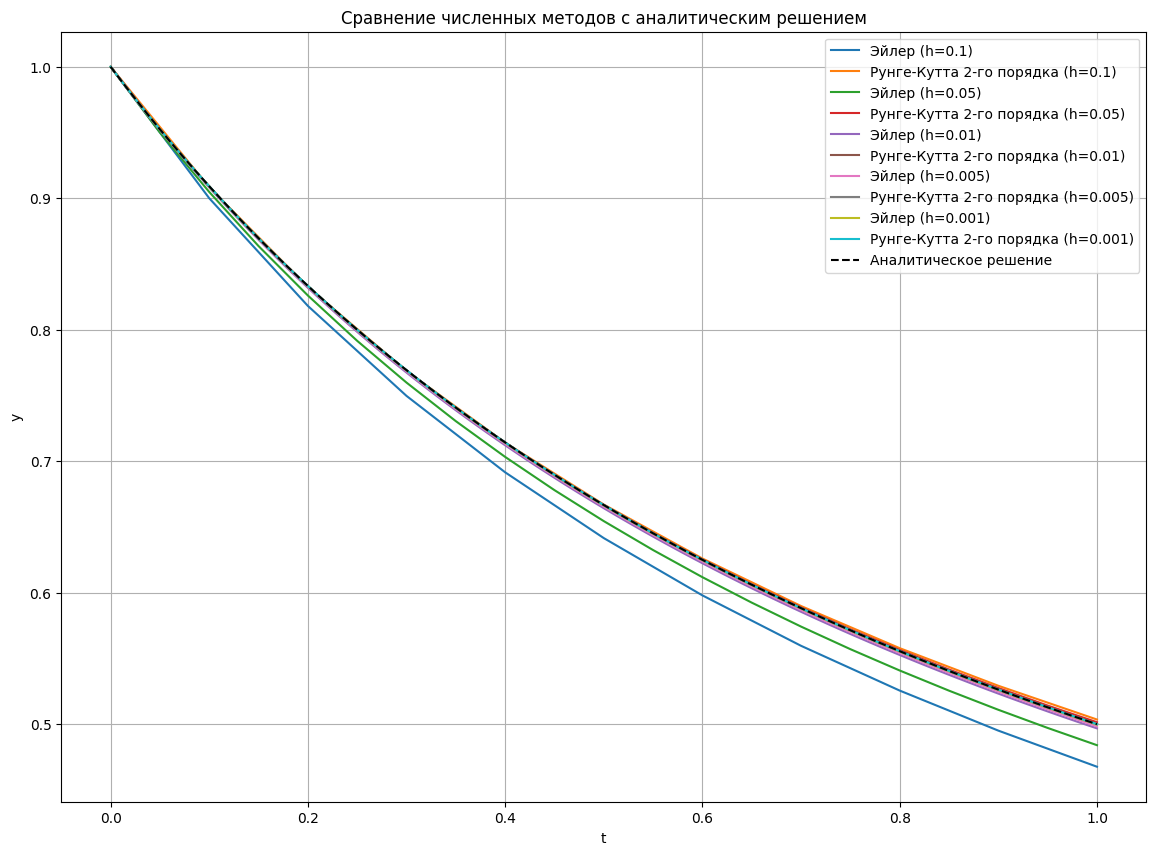


Ошибки метода Эйлера: [0.02395, 0.011719, 0.002305, 0.00115, 0.00023]
Ошибки метода Рунге-Кутты 2-го порядка: [0.001704, 0.000692, 0.000119, 5.9e-05, 1.2e-05]


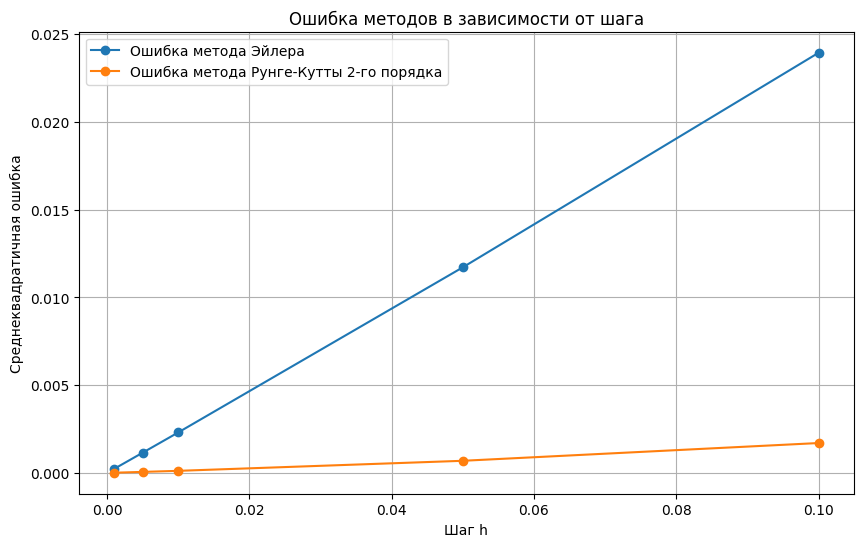


Время выполнения метода Эйлера: [0.000274, 0.000185, 0.000551, 0.001253, 0.00554]
Время выполнения метода Рунге-Кутты 2-го порядка: [0.000313, 0.000284, 0.001337, 0.003583, 0.013168]


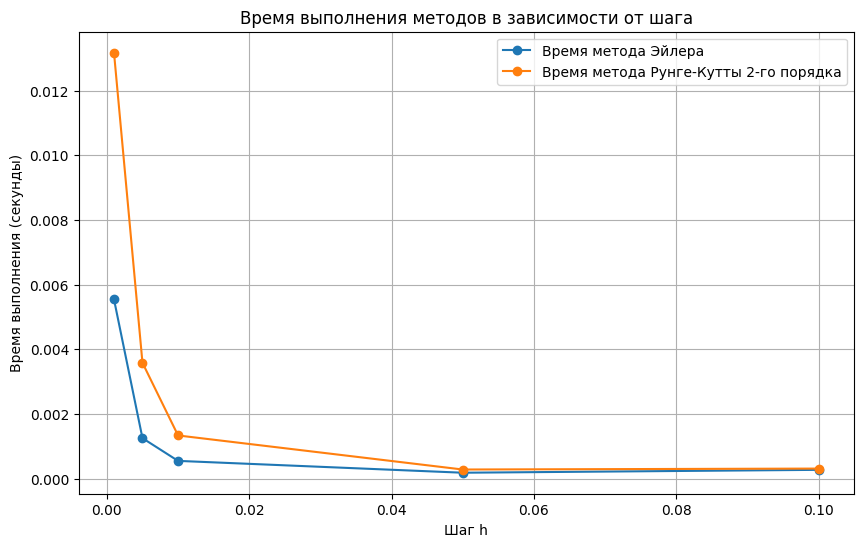

In [ ]:
# Блок 6: Задание параметров и запуск анализа


t_interval = [0, 1]
x0 = (1,)
steps = [0.1, 0.05, 0.01, 0.005, 0.001]

evaculate_methods(t_interval, x0, steps)



Сделайте вывод относительно связи между размером шага, точностью и временем работы программы.

---
 ❗ **Место для Вашего вывода** ❗

 О, как изящно и неумолимо математика требует порядка во всем! Методы численного решения ОДУ, подобно дирижёрам, задают ритм точности и времени вычислений. Однако каждый из них играет свою партию, и в этой гармонии кроется суть выбора.»
	1.	Точность — музыка вычислений
	•	Метод Эйлера, простой и прямолинейный, словно скрипка без канифоли, издает шершавые звуки ошибок, особенно на крупных шагах. Его первый порядок точности требует больших усилий для достижения желаемой точности — шаг должен становиться всё меньше, а ошибки убывают слишком медленно.
	•	Метод Рунге-Кутты 2-го порядка — это уже утончённый инструмент, способный играть точную мелодию. Его ошибки изначально меньше, и их уменьшение происходит быстрее. Даже при малых шагах он остаётся на шаг впереди, демонстрируя стабильность и красоту второй гармоники точности.
	2.	Время — наш капельмейстер
	•	Как сказал бы Скаллета: «Каждая секунда вычислений требует уважения, но не каждая достойна тронного зала точности.»
Время работы обоих методов увеличивается с уменьшением шага, как будто часы ускоряют свой ход в погоне за точностью:
	•	Эйлер, хотя и прост в исполнении, проявляет нестабильность. На некоторых шагах он вдруг задерживается, заставляя нас усомниться в его экономии времени.
	•	Рунге-Кутты 2-го порядка, несмотря на более сложные вычисления, показывает впечатляющую эффективность. Его стабильность в выполнении обещаний точности и времени вызывает уважение.
	3.	Гармония выбора
	•	Если задача требует грубой, быстрой оценки, метод Эйлера, подобно усталому слуге, справится, хоть и будет ворчать на каждом шагу своей ошибки.
	•	Но если нам нужна изящная точность, особенно при мелких шагах, выбор очевиден: Рунге-Кутты 2-го порядка — это тот инструмент, который приводит нас к цели быстро и без лишнего шума.

Финал: Точка опоры между временем и точностью
«Пусть ваш выбор метода будет подобен игре маэстро на тончайших струнах точности и времени. Искусство численных вычислений не терпит компромиссов, оно требует гармонии. Откройте эту музыку!

---
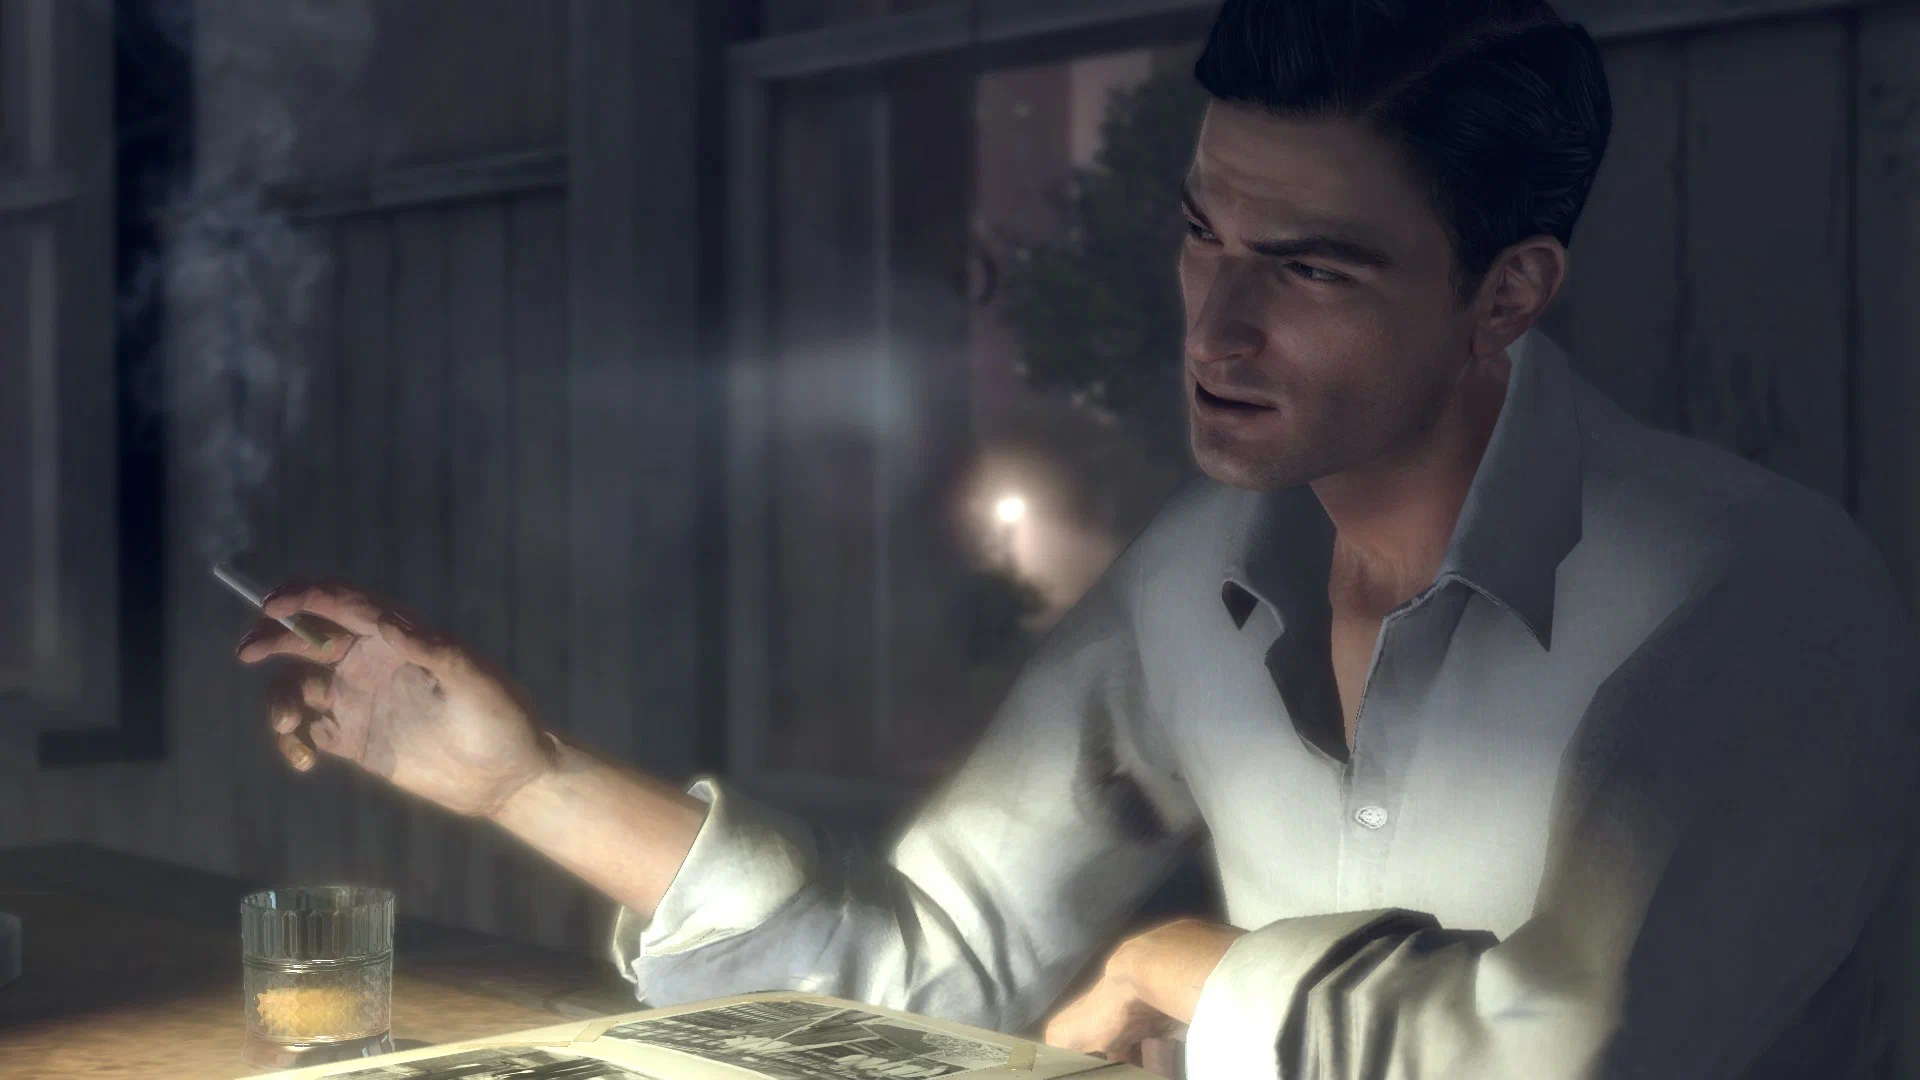

## 2. Метод Эйлера справляется, но лишь сильное уменьшение шага дает адекватную точность. Метод Рунге-Кутты справляется хорошо

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого точности метода Эйлера может не хватить, а метод Рунге-Кутты выручает.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

https://drive.google.com/file/d/1Ljo16gIl2PE7ZgnGHLKc1WP_87DYY9hY/view?usp=sharing

In [4]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t, y):
    return np.cos(t) + 15 * np.sin(t) - 15 * y


In [5]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    return np.sin(t)


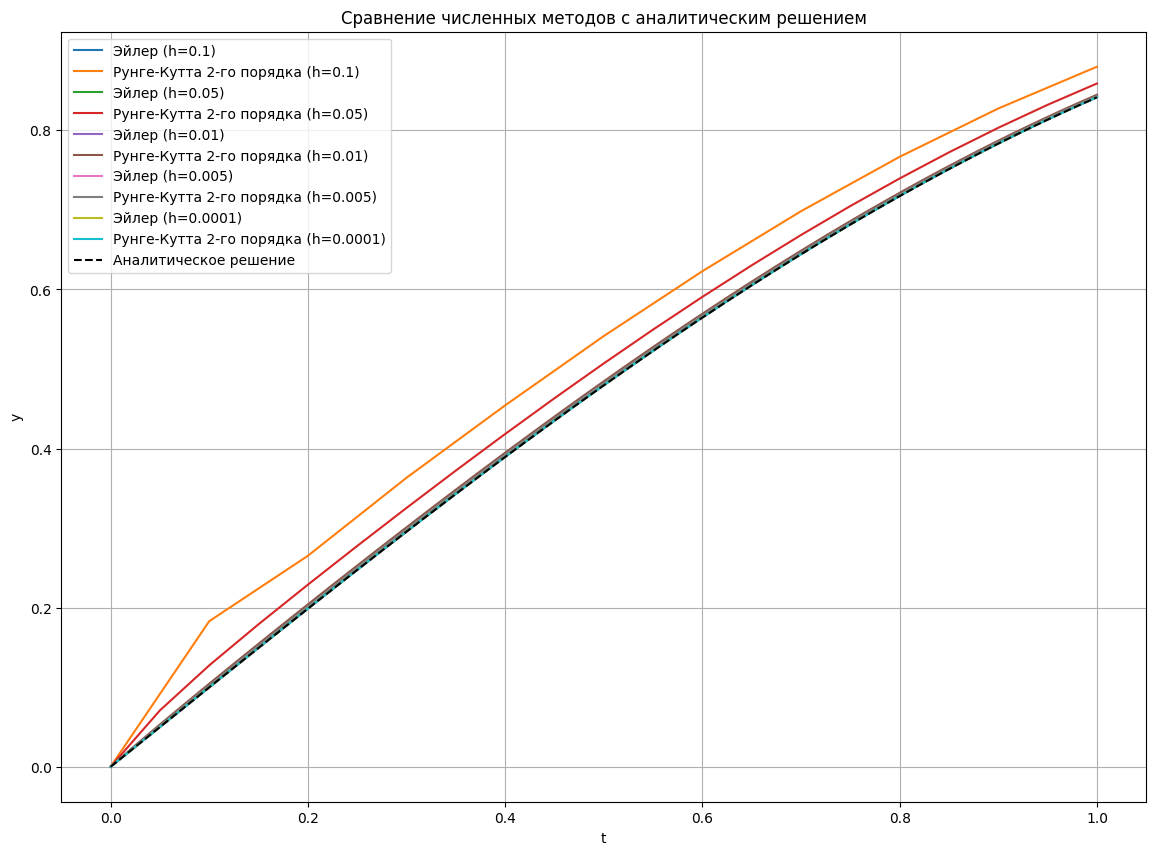


Ошибки метода Эйлера: [0.001696, 0.000821, 0.00016, 8e-05, 2e-06]
Ошибки метода Рунге-Кутты 2-го порядка: [0.057315, 0.025021, 0.004586, 0.00227, 4.5e-05]


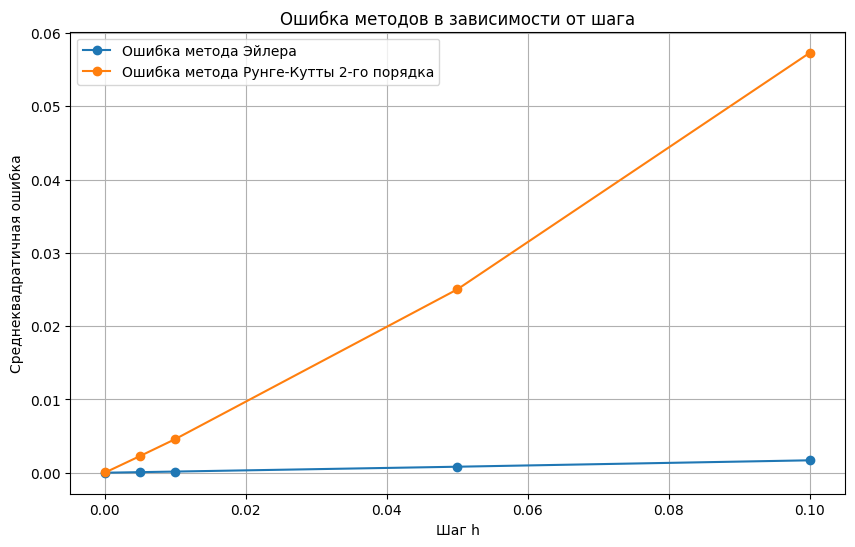


Время выполнения метода Эйлера: [0.000478, 0.000625, 0.00171, 0.006844, 0.154095]
Время выполнения метода Рунге-Кутты 2-го порядка: [0.001644, 0.000732, 0.0144, 0.01585, 0.39849]


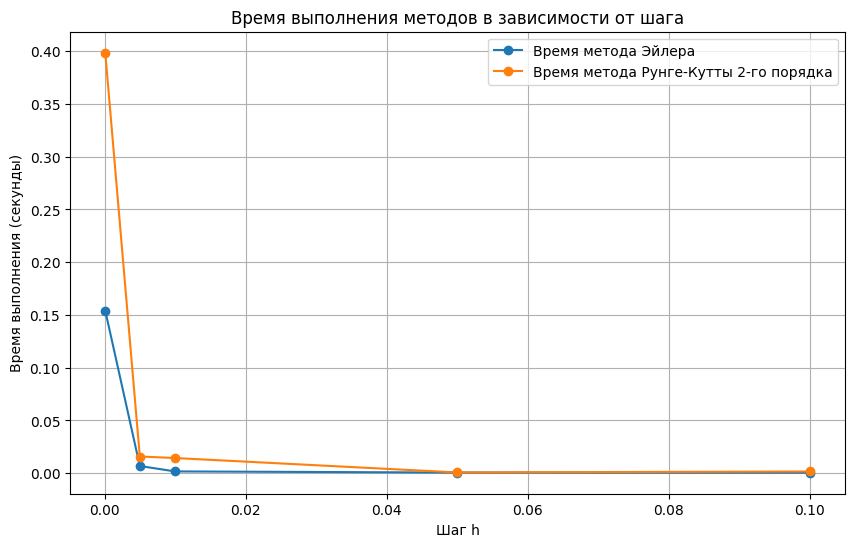

In [9]:
# Блок 6: Задание параметров и запуск анализа


t_interval = [0, 1]
x0 = (0,)
steps = [0.1, 0.05, 0.01, 0.005, 0.0001]

evaculate_methods(t_interval, x0, steps)



Сделайте вывод относительно причин, по которым получается такое поведение методов.

Причины различий в поведении методов, в их порядках точности и способности изменения учитывать внутри шага интегрирования, лежат, хмм? Метод Эйлера, простой и быстрый он, да. Но для уравнений с решениями быстро меняющимися или жёсткими, недостаточен он. Низкий порядок точности имеет, и к величине шага чувствителен он. Для задач таких, непрактичен он становится.

Метод же Рунге-Кутты 4-го порядка, мощным является, хмм. Высокую точность обеспечивает, ибо изменения производной внутри каждого шага учитывает. Позволяет шаги более крупные брать, без точности существенной потери, ммм. Вычислений количество сокращает это, и время выполнения программы тоже.

Для задач, где решения быстро меняются или жёсткие характеристики имеют, методом предпочтительным становится он. Высокую точность и эффективность обеспечивает. Метод этот, выбрать стоит, да.
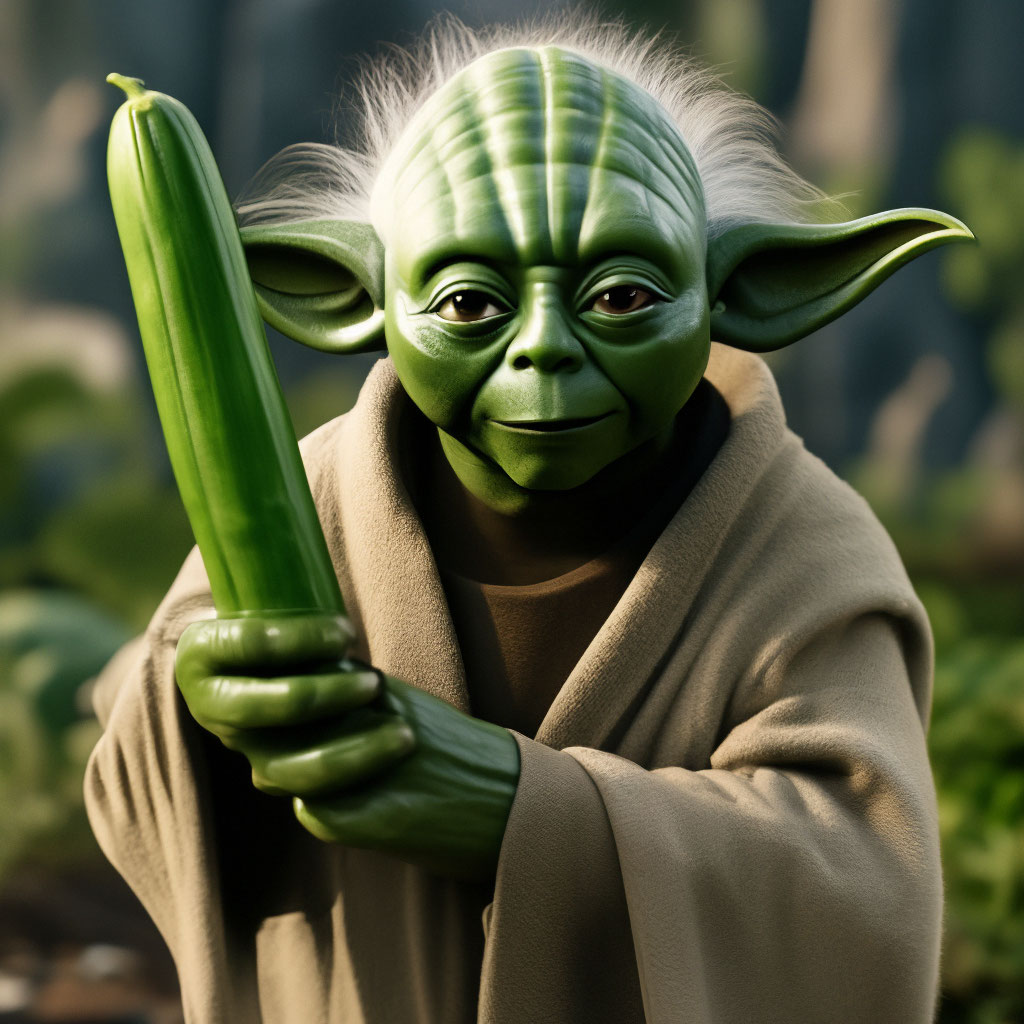

## 3. Оба этих метода не справляются с задачей

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого ни метод Эйлера, ни метод Рунге-Кутты не может получить хорошего результата.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

https://drive.google.com/file/d/1Ljo16gIl2PE7ZgnGHLKc1WP_87DYY9hY/view?usp=sharing

❗ **Место для Вашего решения** ❗

In [1]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''
def f(t, x):
    return x**2

In [6]:
def phi(t):
    return 1/(1-t)


<ipython-input-6-ead65ea460e5>:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(1-t)


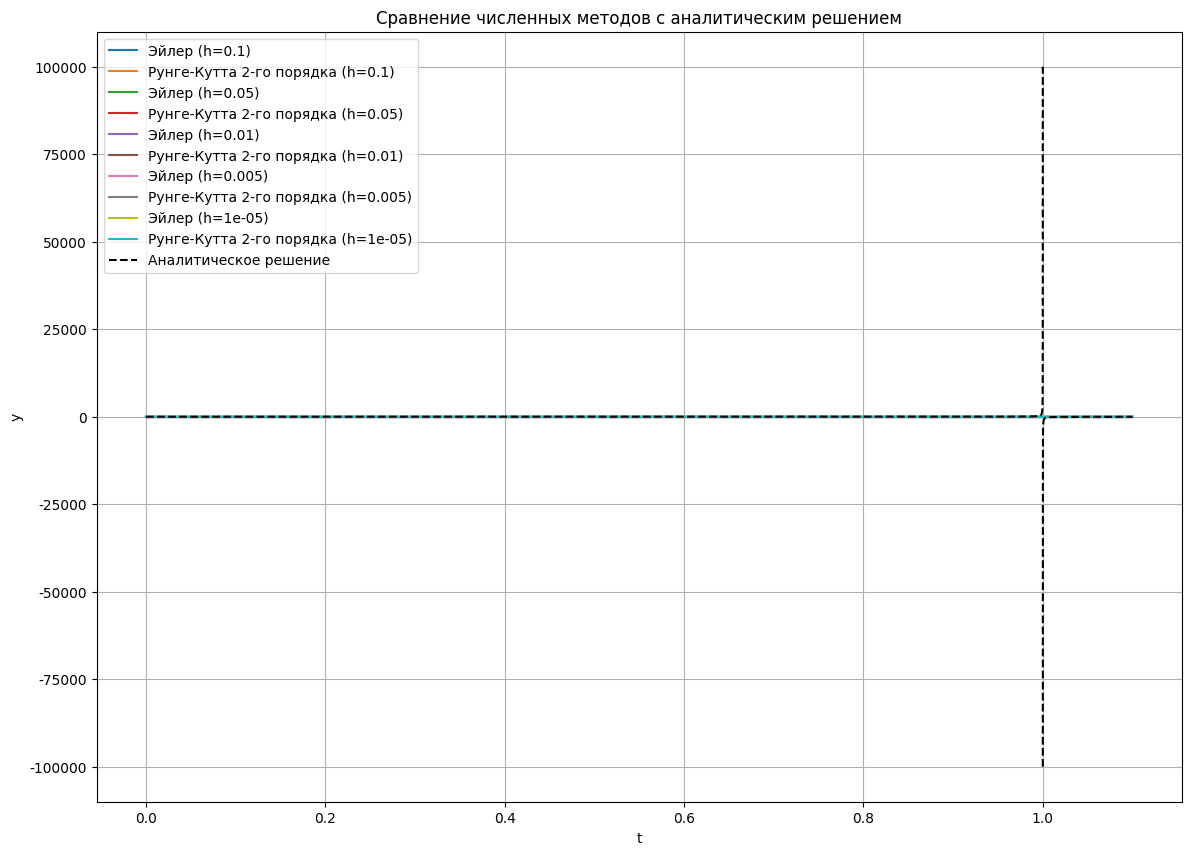


Ошибки метода Эйлера: [inf, inf, inf, inf, inf]
Ошибки метода Рунге-Кутты 2-го порядка: [inf, inf, inf, inf, inf]


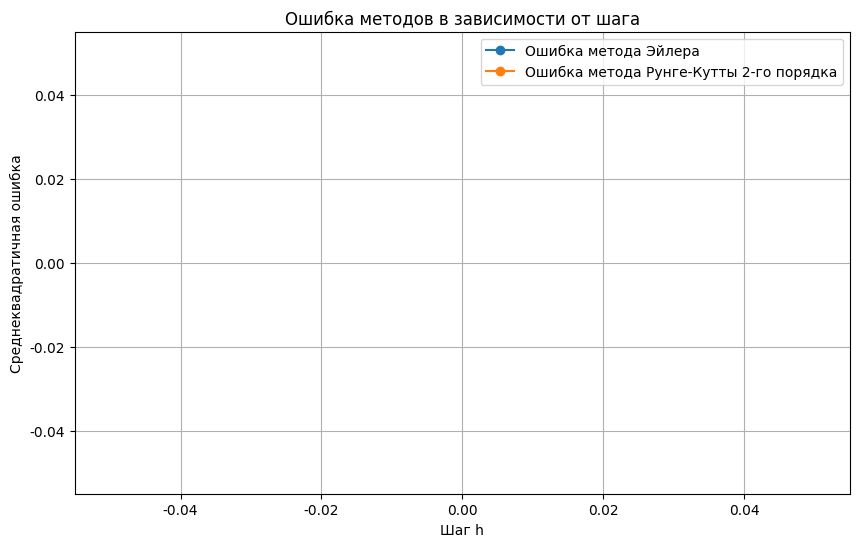


Время выполнения метода Эйлера: [0.00025, 0.00022, 0.000741, 0.001384, 0.689288]
Время выполнения метода Рунге-Кутты 2-го порядка: [0.000324, 0.000454, 0.001988, 0.003958, 1.635944]


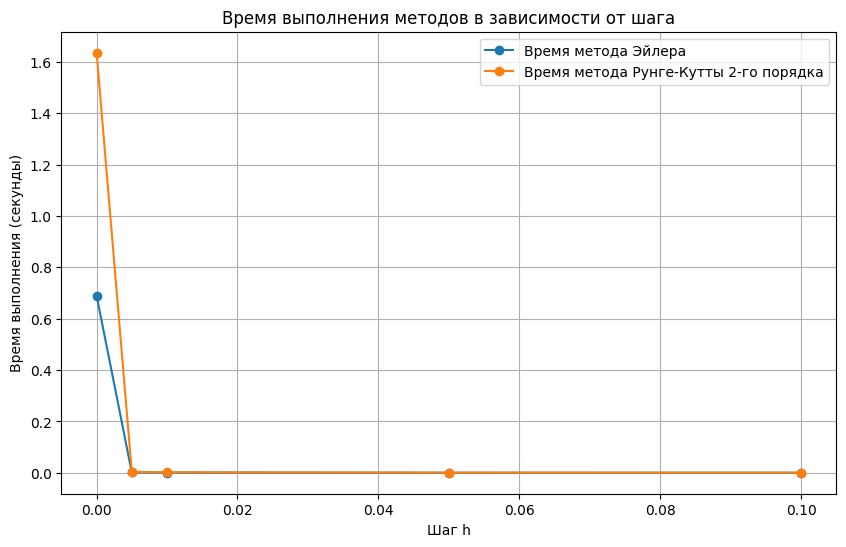

In [13]:

t_interval = [0, 1.1]
x0 = (0,)
steps = [0.1, 0.05, 0.01, 0.005, 0.00001]

evaculate_methods(t_interval, x0, steps)



Сделайте вывод относительно причин неприменимости этих методов.

---
Представь, что ты наблюдаешь за осциллирующим уравнением. Оно движется быстро, его компоненты скачут и затухают, как будто живут в своём собственном ритме. И теперь ты пытаешься использовать методы Эйлера и Рунге-Кутты, чтобы понять его. Но это не их игра.

Метод Эйлера, простой и прямолинейный, требует крошечных шагов, чтобы успевать за этими быстрыми изменениями. Но когда ты увеличиваешь шаг, точность рушится, а система становится неустойчивой. Это как пытаться понять код Матрицы, глядя только на его верхний слой.

Метод Рунге-Кутты даёт тебе больше возможностей — он лучше видит внутренние вибрации. Но даже он, когда сталкивается с жесткими уравнениями, требует малого шага, чтобы выжить. Чем больше шаг, тем меньше контроля, и вот ты уже теряешь понимание происходящего.

Если хочешь понять этот мир, тебе нужен инструмент, который видит глубже. Методы, которые ты используешь, не готовы к этой реальности. Но это лишь начало. Выбор за тобой.

---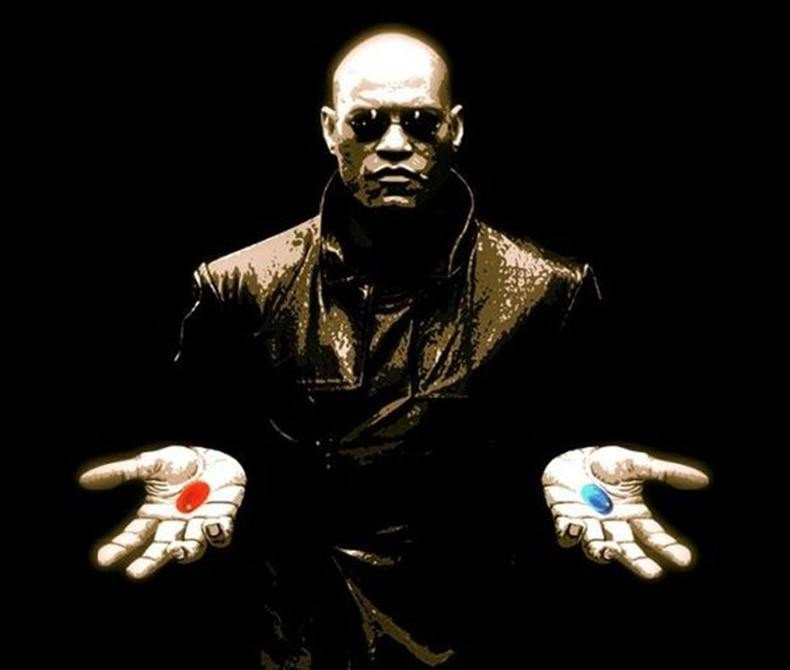

## 4. Применимость методов для задачи с особым решением

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого существует особое решение.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

https://drive.google.com/file/d/1Ljo16gIl2PE7ZgnGHLKc1WP_87DYY9hY/view?usp=sharing

❗ **Место для Вашего решения** ❗

In [18]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''
def f(t, x):
    return t*x+t**3

In [19]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi(t):
    return -t**2 + 3*np.exp(t**2 / 2)-2


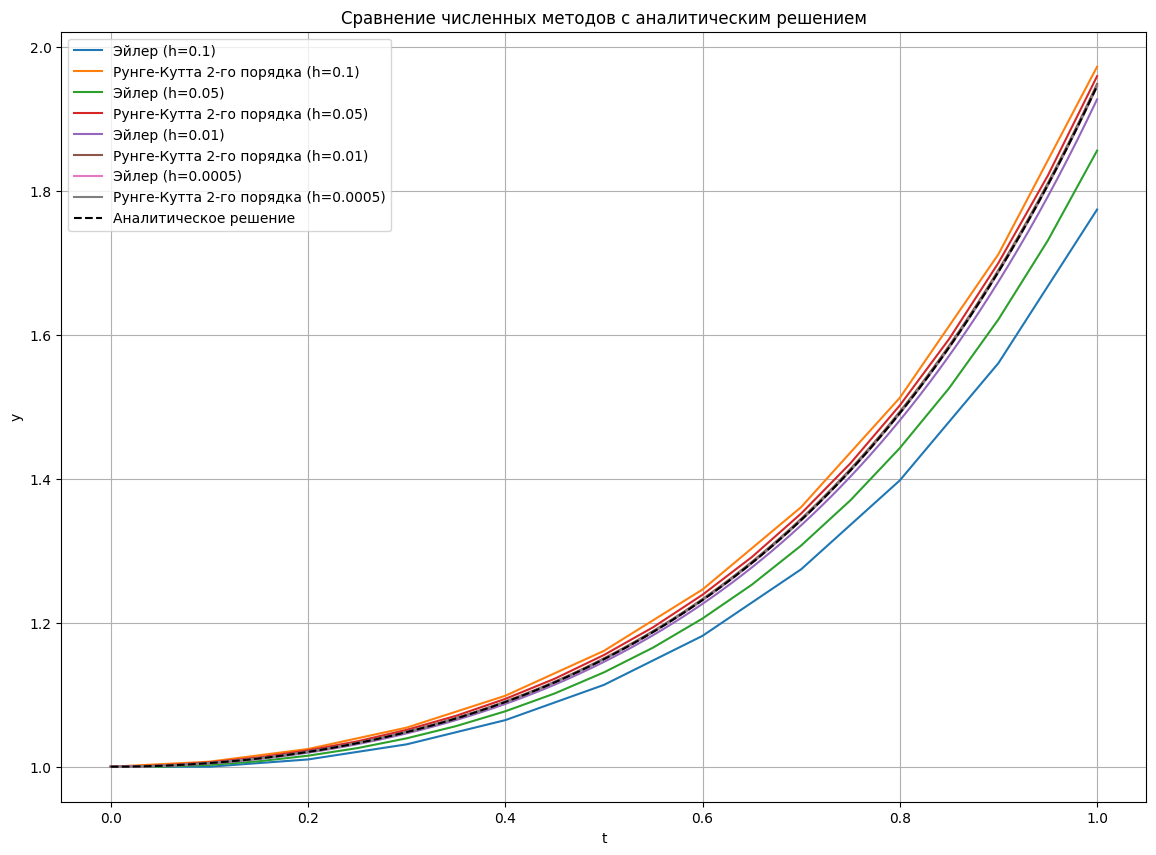


Ошибки метода Эйлера: [0.076189, 0.037818, 0.007505, 0.000374]
Ошибки метода Рунге-Кутты 2-го порядка: [0.015288, 0.007613, 0.001516, 7.6e-05]


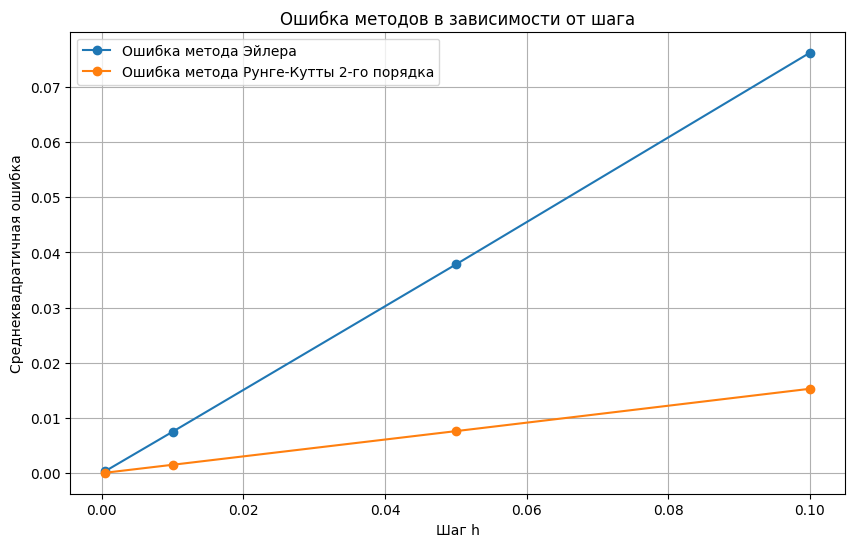


Время выполнения метода Эйлера: [0.00023, 0.000188, 0.000573, 0.010782]
Время выполнения метода Рунге-Кутты 2-го порядка: [0.000329, 0.000373, 0.001426, 0.044549]


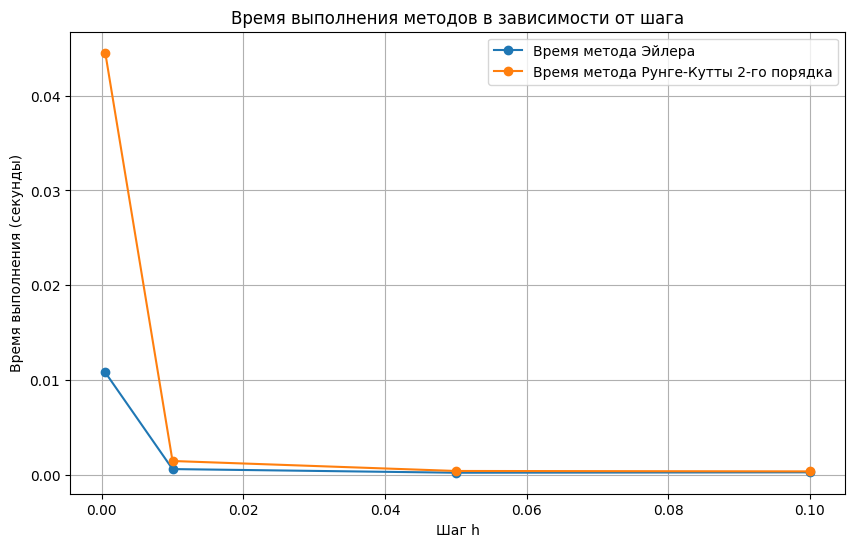

In [26]:

t_interval = [0, 1]
x0 = (1,)
steps = [0.1, 0.05, 0.01, 0.0005]

evaculate_methods(t_interval, x0, steps)



Сделайте вывод относительно произошедшего в моделировании и применимости этих методов к задачам с особым решением.

Численные методы, друзья, такие как Эйлера и Рунге-Кутты, хорошие методы, правда, очень хорошие, но у них есть свои ограничения, и это не секрет. Когда у нас есть уравнения с особым решением — знаете, с резким ростом или сингулярностями — эти методы начинают бороться. Они требуют очень маленького шага. Маленький, очень маленький шаг. И если шаг становится слишком большим, ошибки начинают накапливаться, прямо как некоторые плохие решения. Это не то, чего мы хотим.

Рунге-Кутта, конечно, лучше. Он даёт более точные результаты, потому что он отличный, просто великолепный. Но, знаете, за точность нужно платить. И плата — это время. При малых шагах вычисления становятся длинными, очень длинными. Это непрактично. Мы же не хотим тратить всё своё время, правда?

Вот что мы делаем: для таких задач — особых задач, сложных задач, задач с сингулярностями — нам нужны лучшие методы. Адаптивные методы с переменным шагом? Это прекрасно, друзья. Или методы высокого порядка — звучит впечатляюще, правда? Они сохраняют точность, уменьшают ошибки. Это то, что мы хотим. Это то, что нам нужно. Лучшие методы для лучших решений.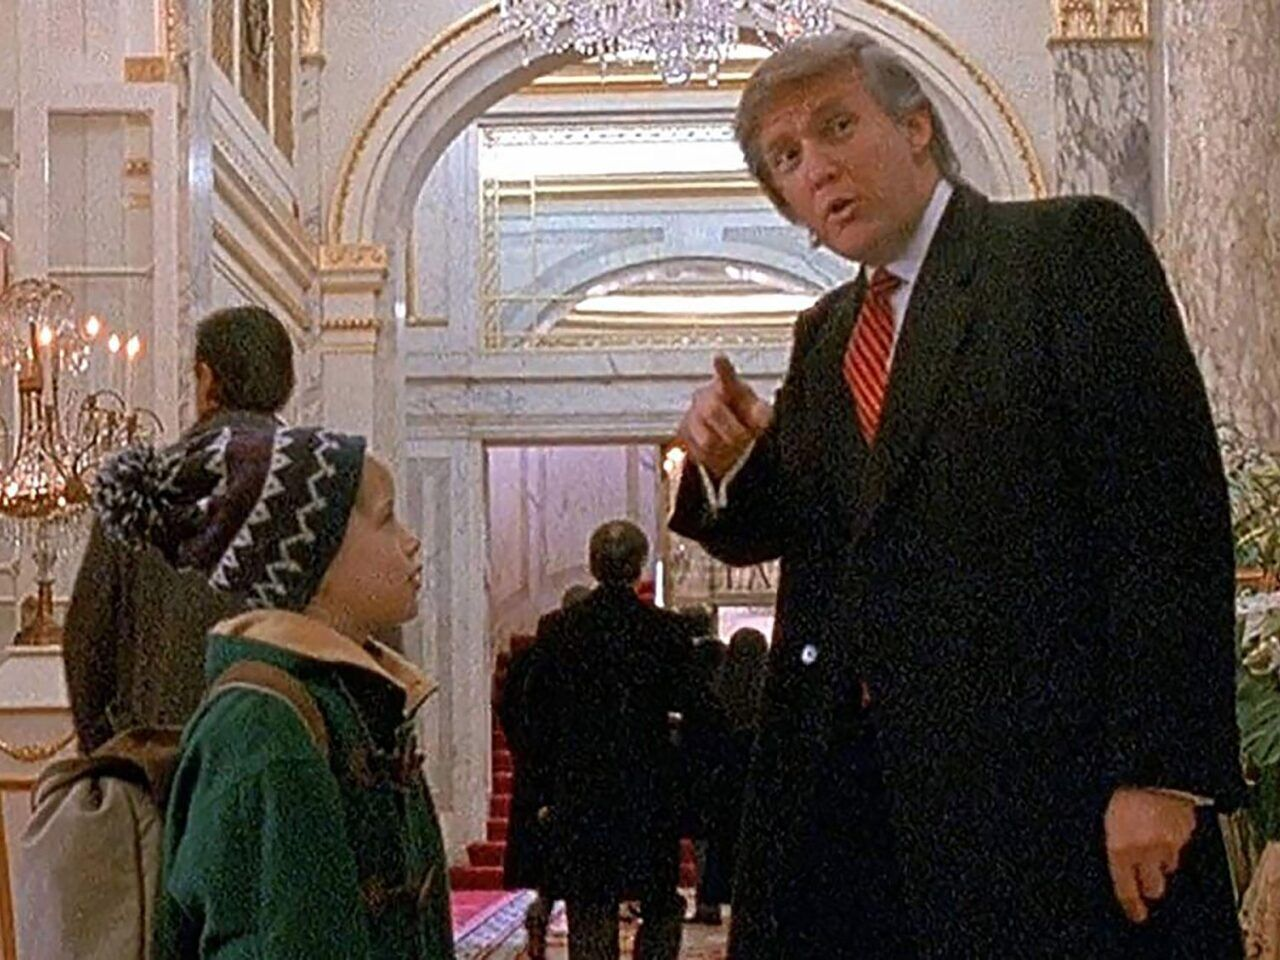

#### \* Дополнительное размышление (Дополнительное задание _по желанию_)

Посмотрите, какие методы могут использоваться для исправления выявленных недостатков приведенных выше методов.

- Опишите кратко теоретические выкладки относительно одного из таких методов.
- Попробуйте объяснить, каким образом предложенный метод помогает бороться с различными недостатками.
- Опишите проблемы, которые появляются (или также проявляются) по сравнению с стандартными методами (Эйлера и Рунге-Кутты).
- Приведите пример, в котором методы Эйлера и Рунге-Кутты не решают задачу, а предложенный в этом пункте метод справляется.

## Задание 2. Восстановление цифр по бракованным картинкам.

В этом пункте мы посмотрим на неожи

### Описание задачи

Вам предоставлен кусок тренировочной выборки из базы данных [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). А также бракованные изображения из этого же датасета.

<p>    
    <center>
    <img src="https://drive.google.com/uc?export=view&id=1jgWvIHwXkhQ1iE6ER0Wy_SLxBvCWW1Dd" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <img src="https://drive.google.com/uc?export=view&id=1AET7slaGnEePLx3qjrxycJSXfHJg55bz" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <em><br>Пример данных из датасета MNIST<br>Сначала: тренировочные изображения,<br>Потом: бракованные изображения</em>
    </center>
</p>

Необходимо, используя простейшую версию [нейронной сети Хопфилда](https://arxiv.org/abs/2008.02217), восстановить цифры на бракованных изображениях.

<p>    
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Hopfield%27s_net.png" alt>
    <em><br>Пример: схема нейронной сети Хопфилда с тремя нейронами</em>
    </center>
</p>

Переписывая заданную в нейронной сети Хопфилда структуру с $m$ нейронами в виде уравнения в матричном виде, можно получить
$$\boxed{x' = A^T \mathrm{softmax}(\beta Ax) - x}, \tag{1}$$
где $A$ — $\text{матрица}_{(m \times n)}$ весов, $\beta \in \mathbb{R}$, $x$ — $\text{вектор}_{(n, 1)}$ входных нейронов, $\mathrm{softmax}(z)_i = \frac{e^{z_i}}{\sum_{k} e^{z_k}}$ — функция активации.

А значит, задача применения нейронной сети с известной$^*$ матрицей весов сводится к решению дифференциального уравнения (1).

<sub>$^*$ Матрица с весами нетрудно получается на
основе тренировочных данных, о чем мы поговорим чуть дальше.</sub>

Нам дальше понадобится функция $\mathrm{softmax}(x)$. Реализуйте более удобную далее в применении $\mathrm{softmax}(\beta \cdot x)$ в функции `softmax(x, beta)`, рассматривая $x$ как массив `numpy.array`, а $\beta$ — как число.

In [ ]:

def softmax(x, beta=1):
    z = beta * x
    z_exp = np.exp(z - np.max(z))
    return z_exp / np.sum(z_exp)


Запишите правую часть уравнения (1), с которым мы дальше будем активно работать, в функцию `dynamics(x, A, beta)`. Используйте в качестве $x$ и $A$ массивы `numpy.array`, а в качестве $\beta$ — число.

In [ ]:

def dynamics(t, x, A, beta):
    softmax_result = softmax(beta * A @ x, beta)
    return A.T @ softmax_result - x

### Интуитивное понимание принципа работы нейронной сети Хопфилда


#### Простой случай на плоскости

Для того, чтобы понять, почему предложенный выше метод работает, необходимо углубиться в дифференциальное уравнение (1).

Как мы помним, для начального анализа мы можем использовать некоторые графические методы. Например, изоклины, или, в более общем случае, --- векторные поля.

Постройте с помощью [`plt.quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) векторное поле для уравнения $x' = A^T \mathrm{softmax} (\beta A x)-x$, положив $A = \begin{bmatrix}1&0\\0&1\\-1&-1\end{bmatrix}$, $\beta=5$.

Добавьте на этот же график точки* $(1,0), (0,1), (-1,-1)$.

_* Заметьте, что это просто точки из матрицы $A$, координаты которых находятся в строках этой матрицы_.

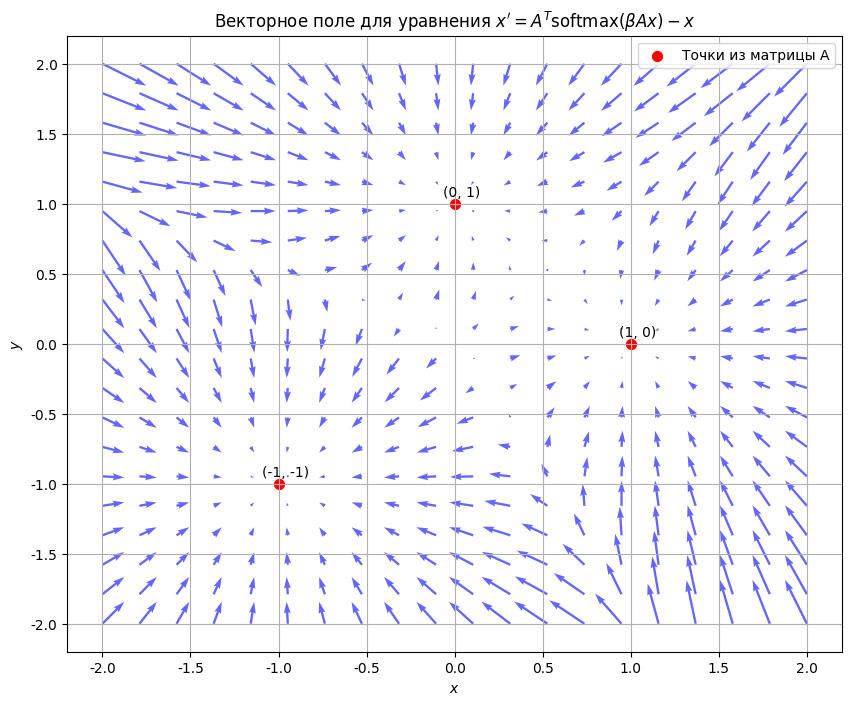

In [ ]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
'''

# Параметры
A = np.array([[1, 0],
              [0, 1],
              [-1, -1]])
beta = 5

# Создаем сетку точек в области [-2, 2] x [-2, 2]
x_values = np.linspace(-2, 2, 20)
y_values = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_values, y_values)

# Инициализируем массивы для компонентов векторов
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Вычисляем векторное поле
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        # Added a dummy 't' argument (0 in this case) since dynamics function expects it
        x_dot = dynamics(0, x_point, A, beta)
        U[i, j] = x_dot[0]
        V[i, j] = x_dot[1]
plt.figure(figsize=(10, 8))

# Отображаем векторное поле
plt.quiver(X, Y, U, V, color='blue', alpha=0.6)

# Добавляем точки из матрицы A
points = np.array([[1, 0], [0, 1], [-1, -1]])
plt.scatter(points[:, 0], points[:, 1], color='red', s=50, label='Точки из матрицы A')

# Подписываем точки
for idx, (x_pt, y_pt) in enumerate(points):
    plt.annotate(f'({x_pt}, {y_pt})', (x_pt, y_pt), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Векторное поле для уравнения $x\' = A^T \\mathrm{softmax}(\\beta A x) - x$')
plt.legend()
plt.grid(True)
plt.show()

Замечаете странное поведение стрелочек? Они как будто смотрят на одну из наших выбранных точек.

Давайте проверим, сохранится ли такое поведение при другой матрице $A$.

Рассмотрите матрицу $A=\begin{bmatrix}2&2\\2&-1\\-3&4\\-4&-3\end{bmatrix}$.

Постройте векторное поле и найдите, какие точки обладают таким же поведением (к ним тянутся стрелочки).


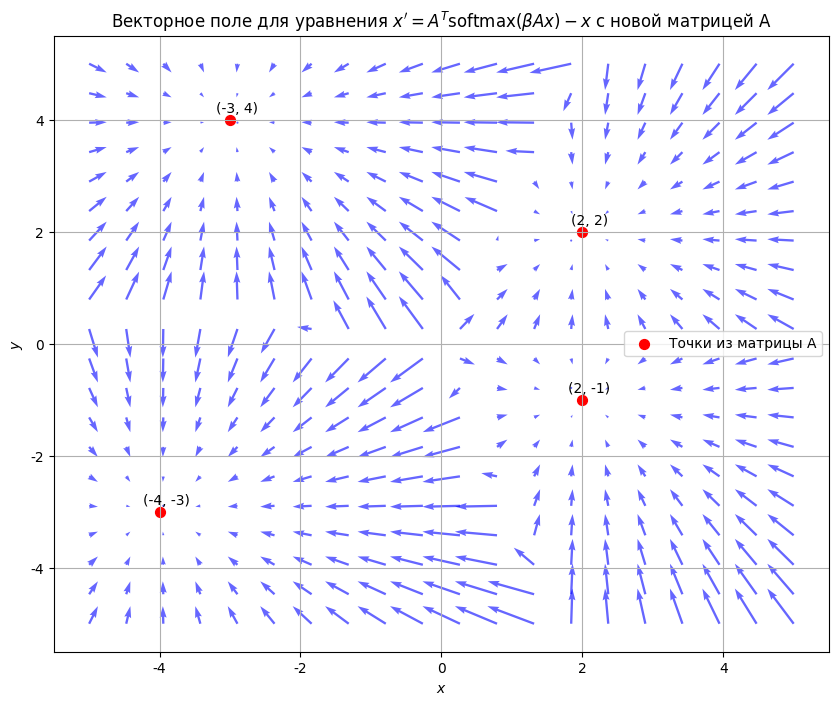

In [ ]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,2],[2,-1],[-3,4],[-4,-3]]
beta = 5
'''

import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(z, beta=1):
    z_beta = beta * z
    exp_z = np.exp(z_beta - np.max(z_beta))
    return exp_z / np.sum(exp_z)

# Define the dynamics function
def dynamics(x, A, beta):
    Ax = np.dot(A, x)
    softmax_result = softmax(Ax, beta)
    x_prime = np.dot(A.T, softmax_result) - x
    return x_prime

# Parameters
A = np.array([[ 2,  2],
              [ 2, -1],
              [-3,  4],
              [-4, -3]])
beta = 5

# Create a grid of points in the range [-5, 5] x [-5, 5]
x_values = np.linspace(-5, 5, 20)
y_values = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_values, y_values)

# Initialize arrays for the vector components
U = np.zeros(X.shape)
V = np.zeros(Y.shape)

# Compute the vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        x_dot = dynamics(x_point, A, beta)
        U[i, j] = x_dot[0]
        V[i, j] = x_dot[1]

plt.figure(figsize=(10, 8))

# Display the vector field
plt.quiver(X, Y, U, V, color='blue', alpha=0.6)

# Add points from matrix A
points = A  # Using the rows of A as points
plt.scatter(points[:, 0], points[:, 1], color='red', s=50, label='Точки из матрицы A')

# Annotate the points
for idx, (x_pt, y_pt) in enumerate(points):
    plt.annotate(f'({x_pt}, {y_pt})', (x_pt, y_pt), textcoords="offset points", xytext=(5, 5), ha='center')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Векторное поле для уравнения $x\' = A^T \\mathrm{softmax}(\\beta A x) - x$ с новой матрицей A')
plt.legend()
plt.grid(True)
plt.show()



Не кажется ли это очень неплохим свойством? Вспомним, что векторное поле показывает как будто бы «направление скорости» нашей системы. А значит, начиная из какой-нибудь точки на плоскости, мы «скатимся» по стрелочкам в одну из заданных нами в матрице $A$ точек.

Подробнее о таком поведении мы поговорим ближе к концу семестра в курсе, а пока стоит понимать это именно на таком интуитивном уровне.


На самом деле, наша система (1) дает даже больше.

Давайте рассмотрим матрицу $A=\begin{bmatrix}2&3\\-3&2\\2&5\\-2&-3\\3&5\end{bmatrix}$. Видно, что несколько предполагаемых "точек притяжения" сгруппированы в первой четверти плоскости.

Постройте векторное поле для уравнения (1), используя данную матрицу, и посмотрите, как наше уравнение справляется с такими сгруппированными точками.

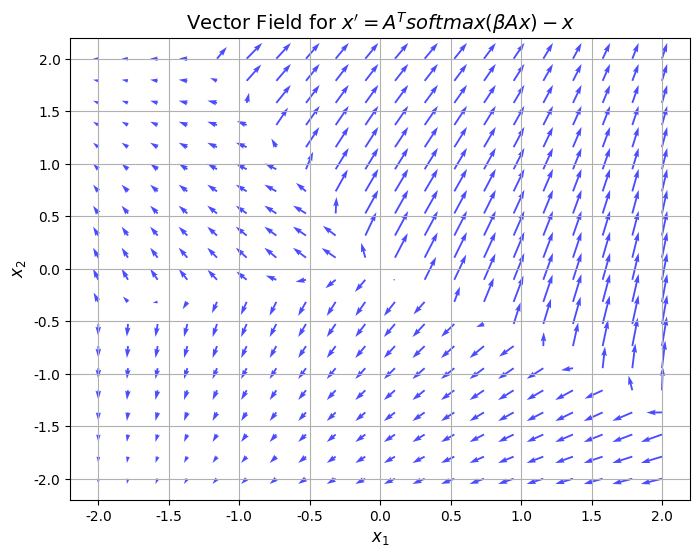

In [ ]:

A = np.array([[2, 3], [-3, 2], [2, 5], [-2, -3], [3, 5]])  # Матрица весов A
beta = 5  # Значение beta

x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)

U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        dx = dynamics(0, x, A, beta)
        U[i, j], V[i, j] = dx[0], dx[1]

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='blue', alpha=0.6)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Векторное поле для исправленной функции динамики и матрицы A")
plt.grid(True)
plt.show()


Возможно, Вам до сих пор не очень понятно, к чему все эти рассуждения и как они помогут нам с обработкой изображения. Давайте переложим рассмотренные выше идеи на датасет `MNIST`.

#### Отношение к изображениям и цифрам

Вспомним, что картинка в компьютере представляется массивом размера `(height, width)`.

Теперь представьте, что мы рассматриваем распрямленную$^*$ картинку, то есть каждый пиксель записан на новой строчке. Получившийся вектор имеет размер `(width*height,1)`.

И этот вектор мы можем подставлять в наше уравнение (1). Решая это уравнение, получим какой-то вектор новой распрямленной картинки, который мы можем обратно привести к исходному размеру `(height, width)`.

<sub>* Заметьте, что мы не теряем информацию о картинке, если помним изначальные размеры, так как в любой момент можем обратно собрать изображение по распрямленному.</sub>

Остается лишь вопрос в матрице $A$. Какую ее брать?

И оказывается, что тут нам помогут наши «точки притяжения». Ведь если мы знаем на каком-то тренировочном наборе, как примерно выглядят цифры, то можем их положить в матрицу $A$. Таким образом, мы получим, что наши тренировочные картинки являются «точками притяжения» для бракованных. А значит любая бракованная, следуя по стрелочкам векторного поля$^*$, придет к одной из тренировочных картинок, тем самым восстановив цифру на изображении.

То есть матрица $A$ будет выглядеть примерно
$$
A =
\begin{bmatrix}
    \text{тренировочная распрямленная картинка 1}\\
    \text{тренировочная распрямленная картинка 2}\\
    \vdots\\
    \text{тренировочная распрямленная картинка k}\\
\end{bmatrix}.
$$

<sub>* Стоит помнить, что теперь мы все манипуляции проворачиваем в пространстве размерности `width*height`. И там уже, конечно, под векторным полем понимается немного другое и изобразить это практически невозможно.</sub>

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Выборка из датасета производится случайным образом!<br>
    Если Вы хотите работать с одними и теми же данными,<br>то сохраните файл <code>mnist.npz</code> к себе на компьютер <br>и каждый раз добавляйте его в Colab,<br>пользуясь кодом ниже.<br> Тогда данные будут читаться из него.</center></p></td>
  </tr>
</table>

In [ ]:
# @title Загрузка файла в Colab (Запускайте только если хотите добавить файл)

from google.colab import files
file =files.upload()

KeyboardInterrupt: 

Training Images


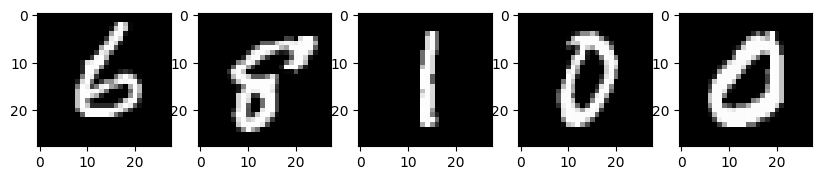

Corrupted Images


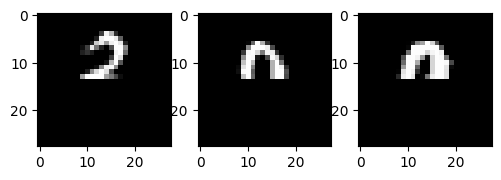

In [ ]:
# @title Загрузка выборки из датасета (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }

import os
import torchvision.datasets as datasets
from random import sample

def show_images(images):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(10,10))
    plt.tight_layout()
    index = 1
    for x in images:
        image = x
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        index += 1

if not os.path.exists('/content/mnist.npz'):
    mnist_trainset = datasets.MNIST(root='/content/MNIST', train=True, download=True)
    train = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 5)]
    test = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 3)]
    np.savez('/content/mnist.npz', train=train, test=test)

data = np.load("/content/mnist.npz")
training_img = data["train"]
training_img = np.asarray(training_img)
corrupted_img = data["test"]
corrupted_img_true = data['test']
for i, item in enumerate(corrupted_img):
    corrupted_img[i][14:, :] = 0

print("Training Images")
show_images(training_img)
plt.show()

print("Corrupted Images")
show_images(corrupted_img)
plt.show()

Теперь у нас есть два набора:
- `training_img` — массив с изображениями, представленными в виде массивов $(28\times 28)$,
- `corrupted_img` — массив с бракованными изображениями, представленными в виде массивов $(28\times 28)$.

#### Обработка данных

Как мы выяснили ранее, для работы с изображениями нам необходимо их распрямить, то есть привести к вектору размера $(784 \times 1)$.

Запишите в переменные `training_img_flatten` и `corrupted_img_flatten` массивы распрямленных изображений соответствующих наборов `training_img` и  `corrupted_img`. Выведите получившиеся размеры массивов, используя [`numpy.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

<sub>_Указание:_ воспользуйтесь функцией [`numpy.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)</sub>

In [ ]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, corrupted_img_flatten.
'''

# Преобразуем обучающие изображения в одномерные массивы и сохраняем их в training_img_flatten
training_img_flatten = np.array([img.reshape(784) for img in training_img])  # Размерность будет (num_training_images, 784)

# Преобразуем поврежденные изображения в одномерные массивы и сохраняем их в corrupted_img_flatten
corrupted_img_flatten = np.array([img.reshape(784) for img in corrupted_img])  # Размерность будет (num_corrupted_images, 784)

# Выводим размерности полученных одномерных массивов
print("Размерность training_img_flatten:", training_img_flatten.shape)
print("Размерность corrupted_img_flatten:", corrupted_img_flatten.shape)



Размерность training_img_flatten: (5, 784)
Размерность corrupted_img_flatten: (3, 784)


#### Обучение сети

Основываясь на наших предположениях из интуитивного понимания принципа работы, заполните матрицу $A$. В этом и заключается обучение нашей сети.

In [ ]:
A = training_img_flatten

$\beta$ зададим равной $10^{-5}$. Вы можете поизменять этот гиперпараметр и написать в выводе, что меняется, или почитать в открытых источниках.

In [ ]:
beta = 1e-2

#### Применение обученной сети = решение дифференциального уравнения

Получается, что применение нашей сети сводится к решению задачи Коши с уравнением (1) и начальным условием, равным бракованной картинке, которую мы хотим восстановить. Понятно, что решать ее в явном виде не имеет смысла (по-крайней мере, потому что это система из 784 уравнений с функцией $\mathrm{softmax}$ внутри). Поэтому будем решать численно.

Воспользуйтесь функцией `Euler_method` из первого задания для решения заданной задачи Коши для каждой бракованной картинки с подставленными матрицей $A$ и скаляром $\beta$.(ТК моя функция эйлера не поддерживает вектроные значения перепишу ее заново в коде ниже)

Получившиеся решения запишите в переменные `solution_i`, где $i$ — порядковый номер бракованной картинки (начинается с нуля).

In [ ]:
'''
Запишите решения задач Коши в переменные solution_i
'''
# Словарь для хранения восстановленных изображений
solutions = {}

# Проходим по каждому поврежденному изображению
for i, corrupted_img in enumerate(corrupted_img_flatten):

    t, restored_img_flatten = Euler_method(dynamics, (0, 10), corrupted_img, 0.01, args={'A': A, 'beta': beta})

    # Сохраняем восстановленное изображение в словарь
    solutions[f'solution_{i}'] = restored_img_flatten

Выведите получившиеся восстановленные изображения бок о бок с исходными бракованными. Как Вы думаете, угадал ли компьютер с цифрой? Сделайте вывод почему.

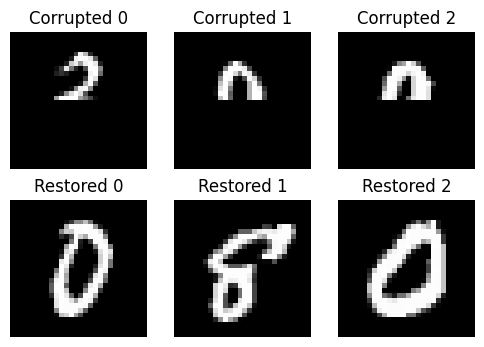

In [ ]:
'''
Вывод изображений: бракованное | восстановленное
'''
fig, axes = plt.subplots(2, 3, figsize=(3 * 2, 4))

for idx, (key, restored_img) in enumerate(solutions.items()):
    axes[0, idx].imshow(corrupted_img_flatten[idx].reshape(28, 28), cmap='gray')
    axes[0, idx].set_title(f"Corrupted {idx}")
    axes[0, idx].axis('off')

    axes[1, idx].imshow(restored_img[-1].reshape(28, 28), cmap='gray')
    axes[1, idx].set_title(f"Restored {idx}")
    axes[1, idx].axis('off')


#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Мне кажется, что плаки плаки. В целом, сеть демонстрирует потенциал сеть восстанавливает изображение до узнаваемого числа, но качество восстановления сильно зависит от сложности дефектов и специфики обучающей выборки, возможно имеет смысл поменять метод решения коши, спойлер это не поможет...*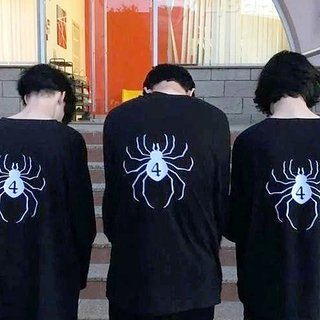

---

## Бонус! <sub>но все еще обязательный</sub>

> Я прекрасно знаю, как Вы все любите лабораторные работы с покемонами еще с первого курса.
>
> Поэтому предлагаю свою версию работы про покемонов.

### Описание задачи

Мне кажется, во всем, что связано с покемонами, есть эпизоды, когда по тени необходимо угадать имена покемонов. Именно это и предлагается сделать Вам в бонусном задании.

И, конечно, было бы интересно заставить это делать Вас самих, но лучше попросим об этом волшебную машину с нейронной сетью Хопфилда.

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Картинка тени покемона каждый раз выбирается случайным образом!<br>
    Если Вы хотите написать вывод по конкретному покемону,<br>то сохраните картинки тени и результата к себе на компьютер <br>и вставьте картинки в вывод.</center></p></td>
  </tr>
</table>

Это что за покемон?


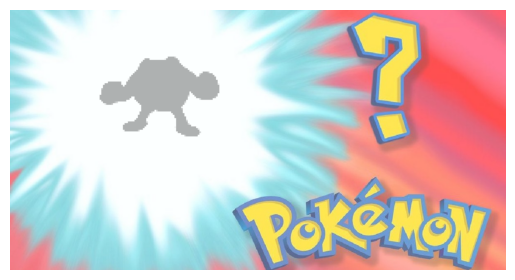

In [ ]:
# @title Загрузка покемонов (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }
import matplotlib.image as mpimg
from urllib.request import urlretrieve
from random import choice, sample

background = mpimg.imread(urlretrieve("https://d31xsmoz1lk3y3.cloudfront.net/big/1582671.jpg?v=1558141242", "bg.jpg")[0])

urls = [
    f'https://assets.pokemon.com/assets/cms2/img/pokedex/full/0{i}.png' for i in sample(range(10, 100), 5)
]

training_img = []
shadow_img = []
for url in urls:
    file_name, _ = urlretrieve(url, "test.png")
    img = mpimg.imread(file_name)
    xx = np.linspace(0, img.shape[0] - 1, 80).astype(int)
    yy = np.linspace(0, img.shape[1] - 1, 80).astype(int)
    resized_img = img[xx, :, :][:, yy, :]
    query_img = np.ones(resized_img.shape)
    query_img[:, :, 0] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 1] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 2] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 3] = resized_img[:, :, 3]
    training_img.append(resized_img)
    shadow_img.append(query_img)

training_img = np.asarray(training_img)
shadow_img = choice(shadow_img)
fig = plt.figure(frameon=False)
plt.imshow(shadow_img, origin='lower', extent=[200, 200+4*shadow_img.shape[0],50,50+4*shadow_img.shape[1]])
plt.imshow(background,alpha=0.7)
plt.axis('off')
plt.axis("tight")
plt.axis("image")
print('\033[1m' + 'Это что за покемон?' + '\033[0m')

Теперь в у нас есть:
- `training_img` — массив с цветными изображениями, представленными в виде массивов,
- `shadow_img` — тень какого-то покемона.

#### Обработка данных

Аналогично случаю с изображениями цифр распрямите изображения в массивы.

In [ ]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, shadow_img_flatten.
'''

training_img_flatten = training_img.reshape(len(training_img), -1)
shadow_img_flatten = shadow_img.reshape(-1)

print("Размерность training_img_flatten:", training_img_flatten.shape)
print("Размерность shadow_img_flatten:", shadow_img_flatten.shape)


Размерность training_img_flatten: (5, 25600)
Размерность shadow_img_flatten: (25600,)


#### Обучение сети

Обучите сеть, задав матрицу $A$.

In [ ]:
'''
Задайте матрицу весов A
'''
A = training_img_flatten


In [ ]:
beta = 1e-1

#### Применение обученной сети

Примените обученную сеть, чтобы определить* покемона по его тени.

На этот раз воспользуйтесь написанной в первом задании функцией `Runge_Kutta_method`.

&nbsp;
&nbsp;

_* Может так оказаться, что результат будет неузнаваем. Тогда Вам необходимо будет поизменять отрезок, на котором решается уравнение, или гиперпараметр `beta`. Обычно что-нибудь из этого способно помочь._

In [ ]:

t, solution = Runge_Kutta_method(dynamics, (0, 25), shadow_img_flatten, 0.1, args={'A': A, 'beta': beta})


Выведите результат бок о бок с тенью.

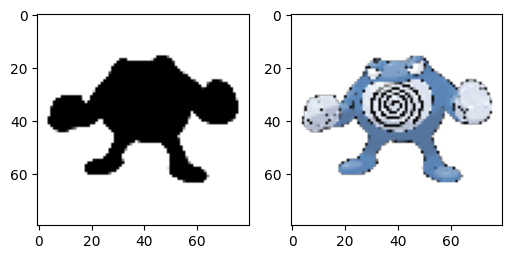

In [ ]:
'''
Вывод изображений: тень | покемон
'''

fig,ax = plt.subplots(1,2,figsize=(6,6))
ax[1].imshow(solution.reshape(len(t), 80, 80, 4)[-1])
ax[0].imshow(shadow_img, cmap='gray')
plt.show()



#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Я, Оптимус Прайм, взываю к мудрости и мощи науки, чтобы объявить: Обширность датасета, объединенная с величественной точностью решения задачи Коши, позволила нашей модели достичь выдающихся высот в искусстве распознавания покемона по его теням. Сквозь бурю гиперпараметров и вихри интервалов мы сражались, чтобы устранить искажения и укротить шумы, обеспечив несокрушимую надежность итогового прогноза.В каждом шаге этого пути отражалась наша миссия: использовать знание во благо, стремиться к совершенству и, превозмогая преграды, выйти победителями. Мы защитили истину и доказали, что даже тень может быть источником света, если подходить к ней с точностью и упорством.*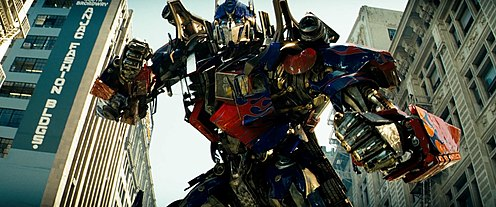
---

#### Самая обязательная часть

Ну и, естественно, Вам необходимо узнать имя выпавшего покемона и его способности 😀

~~Ведь в этом суть лабораторных по программированию, разве нет?!~~

---
> ❗ **Место для имени и способностей покемона** ❗
>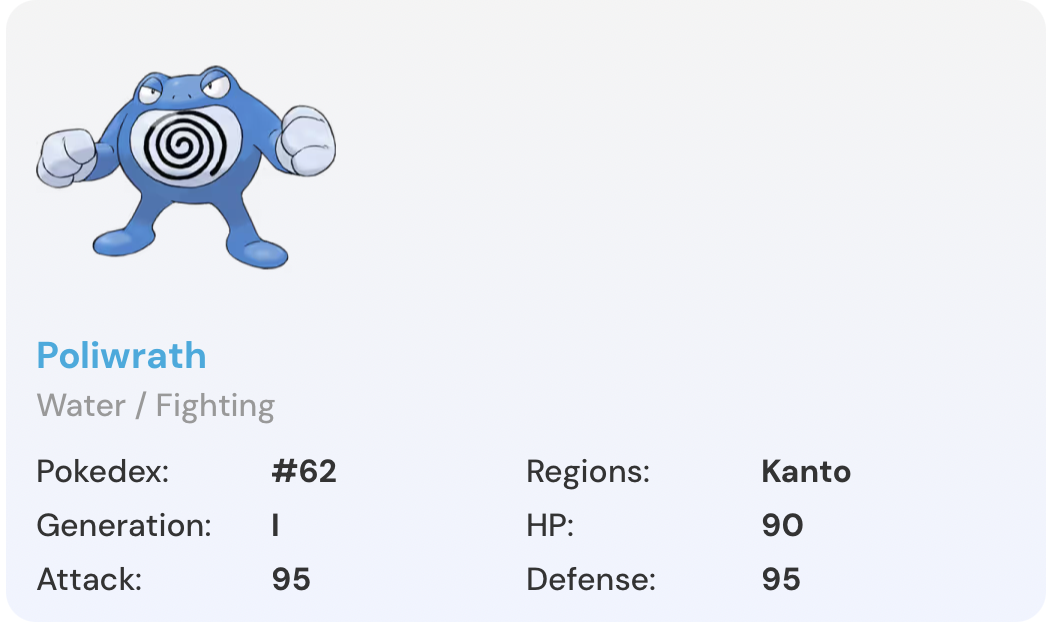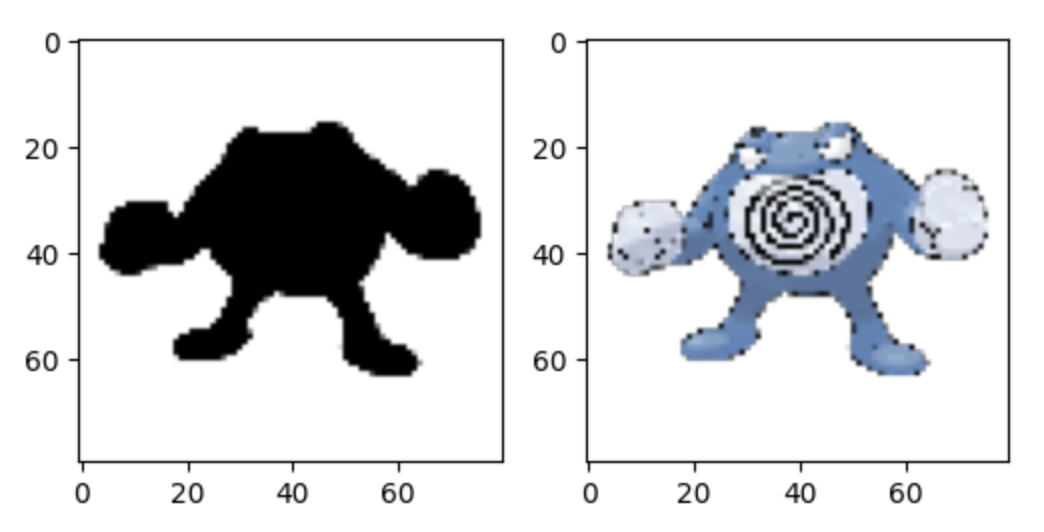
> **
---